In [149]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-02-27 00:59:51,003: Credentials are already in use. The existing account in the session will be replaced.


[[0.         1.34432946 1.43413152 2.65134085 2.78087481 3.78521383
  4.06119894 3.91581121 4.87339653 3.94485238 2.40867383 5.17109311]
 [1.34432946 0.         1.57259719 2.53606117 1.97611065 3.95149041
  3.84901023 3.48664012 3.73876439 2.67710556 2.10295154 4.08579297]
 [1.43413152 1.57259719 0.         1.21817556 1.65298837 2.46402091
  2.62922465 2.49902576 3.90494706 3.28742306 3.49882944 5.60934122]
 [2.65134085 2.53606117 1.21817556 0.         1.37479956 1.46318081
  1.41127228 1.35237795 3.41872338 3.22773171 4.60196724 6.27465348]
 [2.78087481 1.97611065 1.65298837 1.37479956 0.         2.72613734
  2.17356332 1.6396558  2.25659236 1.85629875 4.02879513 5.08617658]
 [3.78521383 3.95149041 2.46402091 1.46318081 2.72613734 0.
  1.10486215 1.69274949 4.37754971 4.50164138 5.96021858 7.73248998]
 [4.06119894 3.84901023 2.62922465 1.41127228 2.17356332 1.10486215
  0.         0.68571496 3.39383239 3.73012615 5.94667348 7.25282068]
 [3.91581121 3.48664012 2.49902576 1.35237795 1.6

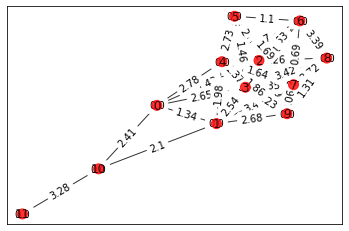

In [151]:
import json
import csv
import ast
from itertools import combinations


with open('data.json') as json_file:
    data = json.load(json_file)
    data = ast.literal_eval(data)

data = np.array(data)
print(data)

n = 12  # Number of nodes in graph
G = nx.Graph()
# G = nx.complete_graph(nqubits)

for i in range(12):
    for j in range(12):
        # print(data[i,j])
        weight=round(data[i,j],2)
        if(weight<3.5):
            G.add_edge(i,j,weight=round(data[i,j],2))
        

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=100, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)        

Q = n*[n*[0]]
Q = np.array(Q)

gamma = 10 / len(G.nodes)

gamma = 100
# Fill in Q matrix
for u, v in G.edges:
    Q[u,u] += 2*G.get_edge_data(u, v)["weight"]
    Q[v,v] += 2*G.get_edge_data(u, v)["weight"]
    Q[u,v] += -4*G.get_edge_data(u, v)["weight"]

for i in G.nodes:
    Q[i,i] += gamma*(1-len(G.nodes))

for i, j in combinations(G.nodes, 2):
    Q[i,j] += 2*gamma



In [152]:
Q

array([[-1082,   195,   195,   190,   189,   200,   200,   200,   200,
          200,   191,   200],
       [    0, -1072,   194,   190,   193,   200,   200,   187,   200,
          190,   192,   200],
       [    0,     0, -1070,   196,   194,   191,   190,   190,   200,
          187,   200,   200],
       [    0,     0,     0, -1068,   195,   195,   195,   195,   187,
          188,   200,   200],
       [    0,     0,     0,     0, -1068,   190,   192,   194,   191,
          193,   200,   200],
       [    0,     0,     0,     0,     0, -1084,   196,     0,   200,
            0,     0,   200],
       [    0,     0,     0,     0,     0,     0, -1080,     0,   187,
            0,     0,   200],
       [    0,     0,     0,     0,     0,   194,   198, -1069,   190,
          188,     0,   200],
       [    0,     0,     0,     0,     0,     0,     0,     0, -1077,
            0,     0,   200],
       [    0,     0,     0,     0,     0,   200,   200,     0,   195,
        -1072,     0

In [153]:
max_cut = Maxcut(Q)
qp = max_cut.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: - 4 x_0 - 3 x_1 - 3 x_2 - 5 x_3 - 5 x_4 - 2 x_5 - 2 x_6 - 2 x_7 - 4 x_8
      - 3 x_9 - 2 x_10 - x_11 + [ 4328 x_0^2 - 780 x_0*x_1 - 780 x_0*x_2
      - 760 x_0*x_3 - 756 x_0*x_4 - 800 x_0*x_5 - 800 x_0*x_6 - 800 x_0*x_7
      - 800 x_0*x_8 - 800 x_0*x_9 - 764 x_0*x_10 - 800 x_0*x_11 + 4288 x_1^2
      - 776 x_1*x_2 - 760 x_1*x_3 - 772 x_1*x_4 - 800 x_1*x_5 - 800 x_1*x_6
      - 748 x_1*x_7 - 800 x_1*x_8 - 760 x_1*x_9 - 768 x_1*x_10 - 800 x_1*x_11
      + 4280 x_2^2 - 784 x_2*x_3 - 776 x_2*x_4 - 764 x_2*x_5 - 760 x_2*x_6
      - 760 x_2*x_7 - 800 x_2*x_8 - 748 x_2*x_9 - 800 x_2*x_10 - 800 x_2*x_11
      + 4272 x_3^2 - 780 x_3*x_4 - 780 x_3*x_5 - 780 x_3*x_6 - 780 x_3*x_7
      - 748 x_3*x_8 - 752 x_3*x_9 - 800 x_3*x_10 - 800 x_3*x_11 + 4272 x_4^2
      - 760 x_4*x_5 - 768 x_4*x_6 - 776 x_4*x_7 - 764 x_4*x_8 - 772 x_4*x_9
      - 800 x_4*x_10 - 800 x_4*x_11 + 4336 x_5^2 - 784 x_5*x_6 -

Above: single node bias = node's degree

Bellow: Direct map of the edges (so together we have 5 of these terms), where i.e.:
[node3, node2, node1, node0] <-> [-1, 1, -1, 1] = [Z, I, Z, I]
! because remember that this is in Insing (not QUBO), because 1 and -1 are the eigenvalues

In [154]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -6452.0
Ising Hamiltonian:
93.5 * ZZIIIIIIIIII
+ 100.0 * ZIZIIIIIIIII
+ 100.0 * IZZIIIIIIIII
+ 100.0 * ZIIZIIIIIIII
+ 100.0 * IZIZIIIIIIII
+ 97.5 * IIZZIIIIIIII
+ 100.0 * ZIIIZIIIIIII
+ 100.0 * IZIIZIIIIIII
+ 94.0 * IIZIZIIIIIII
+ 95.0 * IIIZZIIIIIII
+ 100.0 * ZIIIIZIIIIII
+ 100.0 * IZIIIZIIIIII
+ 100.0 * IIZIIZIIIIII
+ 93.5 * IIIZIZIIIIII
+ 99.0 * IIIIZZIIIIII
+ 100.0 * ZIIIIIZIIIII
+ 100.0 * IZIIIIZIIIII
+ 100.0 * IIZIIIZIIIII
+ 100.0 * IIIZIIZIIIII
+ 97.0 * IIIIZIZIIIII
+ 98.0 * IIIIIZZIIIII
+ 100.0 * ZIIIIIIZIIII
+ 100.0 * IZIIIIIZIIII
+ 96.5 * IIZIIIIZIIII
+ 95.5 * IIIZIIIZIIII
+ 97.0 * IIIIZIIZIIII
+ 96.0 * IIIIIZIZIIII
+ 95.0 * IIIIIIZZIIII
+ 100.0 * ZIIIIIIIZIII
+ 100.0 * IZIIIIIIZIII
+ 94.0 * IIZIIIIIZIII
+ 93.5 * IIIZIIIIZIII
+ 97.5 * IIIIZIIIZIII
+ 97.5 * IIIIIZIIZIII
+ 97.5 * IIIIIIZIZIII
+ 97.5 * IIIIIIIZZIII
+ 100.0 * ZIIIIIIIIZII
+ 100.0 * IZIIIIIIIZII
+ 93.5 * IIZIIIIIIZII
+ 100.0 * IIIZIIIIIZII
+ 95.0 * IIIIZIIIIZII
+ 95.0 * IIIIIZIIIZII
+ 95.5 * IIIIIIZIIZII
+

In [138]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

optimal function value: 7084.0
optimal value: [1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
status: SUCCESS


Since the problem was cast to a minimization problem, the solution of  corresponds to the optimum

energy: -632.0
max-cut objective: -7084.0
solution: [1 1 0 1 0 0 0 0 0 1 1 1]
solution objective: 7084.0


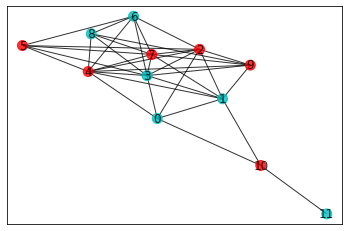

In [143]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

colors = ["r" if x[i] == 0 else "c" for i in range(n)]

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=100, alpha=0.8, ax=default_axes, pos=pos)
    
draw_graph(G, colors, pos)

In [144]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("aer_simulator_statevector")
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

energy: -567.8569624465664
time: 86.5092556476593
max-cut objective: -7019.856962446566
solution: [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
solution objective: 7052.0


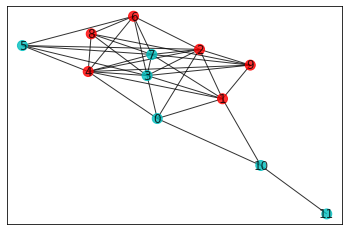

In [145]:
# construct VQE
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

# run VQE
result = vqe.compute_minimum_eigenvalue(qubitOp)

# print results
x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

# plot results
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

optimal function value: 7082.0
optimal value: [1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.]
status: SUCCESS


/opt/conda/lib/python3.8/site-packages/qiskit_optimization/algorithms/optimization_algorithm.py:138: UserWarning: The sum of probability of samples is not close to 1: f{sum_prob}
  warn("The sum of probability of samples is not close to 1: f{sum_prob}")


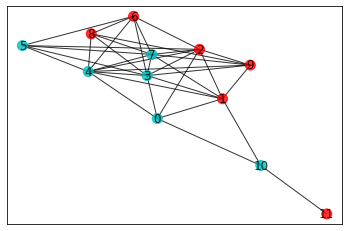

In [146]:
# create minimum eigen optimizer based on VQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result)

colors = ["r" if result.x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)